# Analytics for Wandering Ghost

This is the analytics data visualization note for WebGL game **Wandering Ghost** made for CSCI526(2024Spring).

Methodology used for Analytics:
- Data Collection:
    - Create empty game element in the scenes and write script to specify what data is collected
    - Link to Firebase
- Data Visualization:
    - Downloaded json data from Firebase
    - Use this note to generate statistical charts of collected data.
    
Metric overview:
- [Metric1](#Metric1:-Average-staying-time-in-each-room-in-each-level)
- [Metric2(TBD)](#Metric2)
- [Metric3(TBD)](#Metric3)
- [Metric4(TBD)](#Metric4)

## Set up

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

data_path = 'wandering-ghost-default-rtdb-export.json'

with open(data_path, 'r') as file:
    data = json.load(file)

In [2]:
finished_data = data['Finish']
unfinished_data = data['UnFinish']

## Metric1: Distribution of Time Spent in Each Room Across Levels
**Description:**
This metric evaluates the distribution of time players spend in each room across different levels, using a box plot for visual representation. The room here is identified as any such space that players can navigate and interact with game objects that is not directly linked to or containing the goal.


**Justification:**
In designing the game's map, rooms are crafted with distinct challenges and mechanics, guiding players toward the ultimate goal. By examining the distribution of time spent in each room, insights into player exploration patterns are revealed. This analysis identifies rooms that may be overly complex or lacking clear instruction, enabling targeted improvements in puzzle design and difficulty balancing. The choice of a box plot presentation minimizes bias by showcasing the variability and central tendency of time spent, rather than just averages.


**Interpretation:**
A wide spread in the distribution may indicate varied player experiences, suggesting that a puzzle's difficulty might be inconsistent or that players are having difficulty finding essential elements to progress. Conversely, a narrow distribution centered around lower time values could point to areas that lack challenge or fail to fully engage players. Adjustments could involve modifying the complexity of obstacles, altering the number and clarity of hints, or reevaluating the room's design to ensure it contributes positively to the game's overall experience.


In [3]:
def process_data(data):
    levels = {}
    for each_data in finished_data:
        level_info = finished_data[each_data]
        level_id = level_info['levelID']
        level_name = level_info['levelName']
        total_time_spent = level_info['totalTimeSpent']
        print(level_id)

        if level_id not in levels:
            levels[level_id] = {'totalTimeSpent': [], 'rooms': {}}

        levels[level_id]['totalTimeSpent'].append(total_time_spent)

        print(levels[level_id])

        if 'rooms' in level_info:
            for room in level_info['rooms']:
                room_name = room['roomName']
                room_id = room['roomID']
                time_spent = room['timeSpent']
                if room_id not in levels[level_id]['rooms']:
                    levels[level_id]['rooms'][room_id] = []
                levels[level_id]['rooms'][room_id].append(time_spent)
    return levels

In [4]:
levels = process_data(finished_data)

Level1
{'totalTimeSpent': [34.90228271484375], 'rooms': {}}
Level0
{'totalTimeSpent': [23.031295776367188], 'rooms': {}}
Level1
{'totalTimeSpent': [34.90228271484375, 38.759193420410156], 'rooms': {'Room1': [10.169261932373047], 'Room2': [3.7192885875701904], 'Room3': [12.781781196594238]}}
Level2
{'totalTimeSpent': [53.76894760131836], 'rooms': {}}
Level0
{'totalTimeSpent': [23.031295776367188, 13.446446418762207], 'rooms': {}}
Level0
{'totalTimeSpent': [23.031295776367188, 13.446446418762207, 16.327857971191406], 'rooms': {}}
Level1
{'totalTimeSpent': [34.90228271484375, 38.759193420410156, 34.46465301513672], 'rooms': {'Room1': [10.169261932373047, 13.047257423400879], 'Room2': [3.7192885875701904, 5.958754539489746], 'Room3': [12.781781196594238, 8.02037239074707]}}
Level0
{'totalTimeSpent': [23.031295776367188, 13.446446418762207, 16.327857971191406, 21.8325138092041], 'rooms': {}}
Level0
{'totalTimeSpent': [23.031295776367188, 13.446446418762207, 16.327857971191406, 21.8325138092

In [5]:
def box_plot_data(levels, save_path):
    # initialize a dictionary to hold the data for box plots
    level_room_data = {level: {} for level in levels if level != 'Level0'}
    room_names = set()

    # collect data for each room in each level, excluding Level0
    for level_id, level_info in levels.items():
        if level_id == 'Level0':
            continue  # Skip Level0
        for room_id, times in level_info['rooms'].items():
            room_names.add(room_id)  # Keep track of room names for labeling
            if room_id not in level_room_data[level_id]:
                level_room_data[level_id][room_id] = []
            level_room_data[level_id][room_id].extend(times)

    # sort room names for consistent ordering
    sorted_room_names = sorted(room_names, key=lambda x: int(x.replace('Room', '')))

    # create a figure and axis for the plot
    fig, ax = plt.subplots()

    # number of levels and rooms will determine the width of the bars
    n_levels = len(level_room_data)
    n_rooms = len(sorted_room_names)
    width = 1 / (n_rooms + 1)  # width of each box, with some spacing
    positions = np.arange(1, n_levels + 1)  # the x locations for the groups

    # plot box plots for each room within each level, excluding Level0
    room_colors = ['blue', 'green', 'red', 'orange']  # colors for the median lines
    for i, room in enumerate(sorted_room_names):
        data_to_plot = []
        for level in sorted(level_room_data.keys(), key=lambda x: int(x.replace('Level', ''))):
            if room in level_room_data[level]:
                data_to_plot.append(level_room_data[level][room])
            else:
                data_to_plot.append([])  # no data for this room in this level

        # create box plots
        box = ax.boxplot(data_to_plot, positions=np.array(positions) + i * width, widths=width)
        
        # customize colors for each room's median line
        for median in box['medians']:
            median.set(color=room_colors[i], linewidth=2)

    # add labels
    ax.set_xticks(positions + width * (n_rooms - 1) / 2)
    ax.set_xticklabels(['Level ' + str(i) for i in range(1, n_levels + 1) if 'Level' + str(i) in level_room_data])
    ax.set_ylabel('Time spend /s')
    ax.set_title('Time spent in each room by level')

    # add legend with room names
    ax.legend([plt.Line2D([0], [0], color=room_colors[i], lw=4) for i in range(n_rooms)], sorted_room_names)

    # save the figure
    plt.savefig(save_path)
    plt.show()

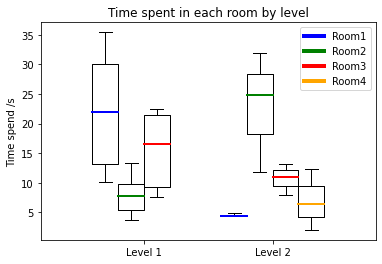

In [6]:
# Plot the data
box_plot_data(levels, 'room_time_distribution_plot.png')

## Metric2
TBD

## Metric3
TBD

## Metric4
TBD